In [165]:
import pandas as pd
from pandas import Series, read_csv
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR

In [166]:
df = read_csv('sms_usage.csv',header=0, parse_dates=[0], index_col=0, squeeze=True )

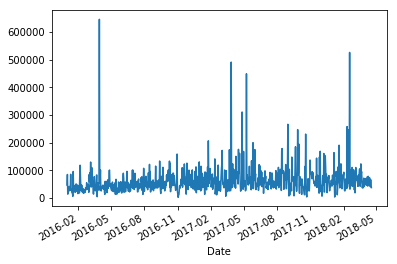

In [167]:
df.plot() 

In [168]:
x = df.values

In [169]:
train,test = x[1:len(x)-30], x[len(x)-30:]

In [170]:
m = AR(train, freq='D')

In [171]:
model  = m.fit()

In [172]:
window = model.k_ar
window

20

In [173]:
coef = model.params
coef

array([ 3.53403778e+04,  2.94168323e-02,  2.17323539e-02,  4.07625060e-02,
        5.15336513e-02, -6.00946940e-03, -2.82351442e-02,  1.52405209e-01,
        2.49960026e-02, -1.48437914e-02, -6.86162603e-05, -1.80994608e-02,
        3.17640459e-02, -1.23444125e-02,  4.84720800e-02, -6.21836354e-02,
        3.45568064e-02,  3.80755500e-02,  4.24499058e-02, -1.43472369e-03,
        7.39092238e-02])

In [174]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = []

In [175]:
for t in range(len(test)):
    lag = [history[i] for i in range(len(history)-window,len(history))]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]       
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=70612.821693, expected=123509.000000
predicted=61931.749631, expected=87692.000000
predicted=63035.876977, expected=95519.000000
predicted=74674.181824, expected=61324.000000
predicted=73605.011150, expected=37358.000000
predicted=65281.194802, expected=47771.000000
predicted=62751.767407, expected=36790.000000
predicted=72246.380855, expected=55217.000000
predicted=63136.417558, expected=72082.000000
predicted=70107.758238, expected=41376.000000
predicted=61538.916484, expected=52877.000000
predicted=57517.943144, expected=64568.000000
predicted=58501.104843, expected=70620.000000
predicted=63977.697411, expected=58782.000000
predicted=66965.345722, expected=67550.000000
predicted=65621.084396, expected=46139.000000
predicted=64012.918030, expected=67730.000000
predicted=65142.213347, expected=68652.000000
predicted=64932.020645, expected=77316.000000
predicted=67125.185238, expected=43441.000000
predicted=68519.774434, expected=78592.000000
predicted=66164.490914, expected=

In [176]:
# predicted = model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)

In [177]:
'standard errors: ',model.bse

('standard errors: ',
 array([7.59053884e+03, 3.59829021e-02, 3.60002219e-02, 3.59766581e-02,
        3.59826514e-02, 3.59977458e-02, 3.59204011e-02, 3.58795574e-02,
        3.62929856e-02, 3.62807231e-02, 3.62791803e-02, 3.62690957e-02,
        3.62701089e-02, 3.62733441e-02, 3.58582397e-02, 3.58906848e-02,
        3.59768966e-02, 3.59373289e-02, 3.59225388e-02, 3.59392583e-02,
        3.59266510e-02]))

In [195]:
print('MSError: ', mean_squared_error(predicted, test))
print('Final prediction error: ',model.fpe)

MSError:  386574124.25381887
Final prediction error:  2483658408.41798


In [196]:
print('No of trend term:  ', model.k_trend)
print('Lag length: ', model.k_ar)

No of trend term:   1
Lag length:  20


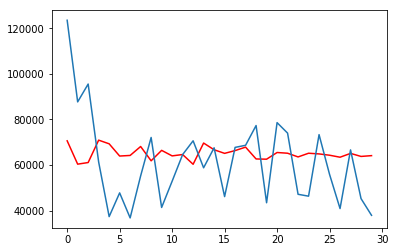

In [183]:
plt.plot(predicted,color='red')
plt.plot(test)